In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import tensorflow_datasets as tfds
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import (
    models,
    layers,
) 
from matplotlib import pyplot as plt
import numpy as np
import random


In [2]:
cifar_10_labels = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
    }

In [3]:
class RandomIntegers():
    def __init__(self):
        pass
    
    def generate(self, n, length):
        # Generate n unique random integers between 0 and length
        random_integers = random.sample(range(length), n)
        
        return random_integers

#### CIFAR-10
###### CIFAR-10 dataset consists of 60000 32×32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

In [4]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train/255
x_test = x_test/255

### Plot dataset

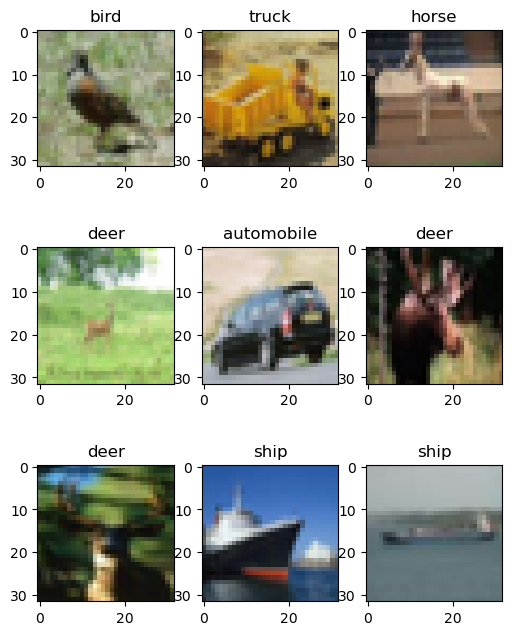

In [5]:
def display_images():
    random_integers = RandomIntegers().generate(9, len(x_train))
    plt.figure(figsize=(6, 8))
    counter = 0
    for i in random_integers:
        # define subplot
        plt.subplot(330 + 1 + counter)
        counter += 1
        # plot raw pixel data
        plt.imshow(x_train[i])
        plt.title(cifar_10_labels[y_train[i][0]])
    # show the figure
    plt.show()
display_images()

### Build Model

In [13]:
model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tensorflow.keras.layers.Dense(128, activation='relu'),
    tensorflow.keras.layers.Dense(32, activation='relu'),
    tensorflow.keras.layers.Dense(10, activation='softmax')
])

### Compiling the model

In [14]:
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

#### Model Training

In [15]:
history = model.fit(x_train,
                    y_train,
                    epochs=25,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/25
98/98 [==============================] - 2s 16ms/step - loss: 4.5995 - sparse_categorical_accuracy: 0.1535 - val_loss: 2.2282 - val_sparse_categorical_accuracy: 0.1974
Epoch 2/25
98/98 [==============================] - 1s 7ms/step - loss: 2.2013 - sparse_categorical_accuracy: 0.2128 - val_loss: 2.2221 - val_sparse_categorical_accuracy: 0.2290
Epoch 3/25
98/98 [==============================] - 1s 7ms/step - loss: 2.2160 - sparse_categorical_accuracy: 0.2226 - val_loss: 2.2186 - val_sparse_categorical_accuracy: 0.2297
Epoch 4/25
98/98 [==============================] - 1s 7ms/step - loss: 2.1546 - sparse_categorical_accuracy: 0.2383 - val_loss: 2.0601 - val_sparse_categorical_accuracy: 0.2545
Epoch 5/25
98/98 [==============================] - 1s 7ms/step - loss: 2.0407 - sparse_categorical_accuracy: 0.2626 - val_loss: 2.0310 - val_sparse_categorical_accuracy: 0.2702
Epoch 6/25
98/98 [==============================] - 1s 7ms/step - loss: 2.0508 - sparse_categorical_accuracy:

#### Plot Accuracy

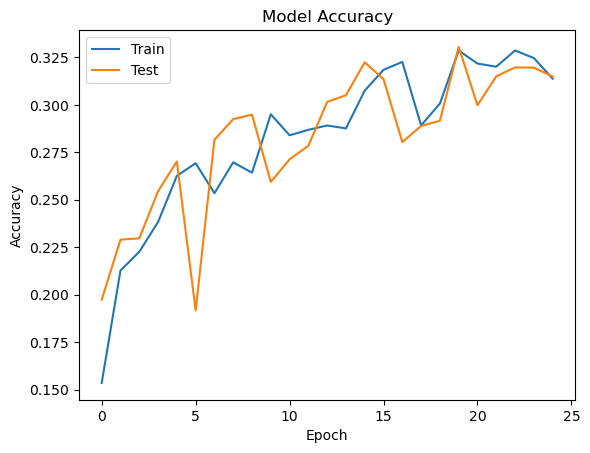

In [16]:
# Plot the accuracy from the training history
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()